<a href="https://colab.research.google.com/github/arti1117/making-tars/blob/main/hg-mldl/08_3_Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-cnn-model.h5', save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2, restore_best_weights=True
)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1500/1500 [==============================] - 25s 9ms/step - loss: 0.5307 - accuracy: 0.8107 - val_loss: 0.3493 - val_accuracy: 0.8680
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3630 - accuracy: 0.8722 - val_loss: 0.2926 - val_accuracy: 0.8896
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3078 - accuracy: 0.8894 - val_loss: 0.2689 - val_accuracy: 0.8981
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2762 - accuracy: 0.8984 - val_loss: 0.2522 - val_accuracy: 0.9082
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2533 - accuracy: 0.9081 - val_loss: 0.2405 - val_accuracy: 0.9077
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2317 - accuracy: 0.9156 - val_loss: 0.2396 - val_accuracy: 0.9130
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/ste

In [31]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.018029802 0.24247071


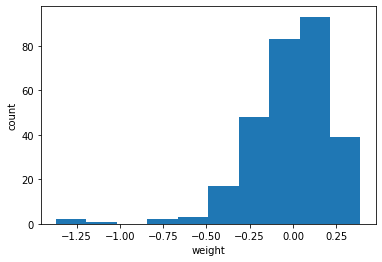

In [7]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [9]:
conv_weights.reshape(-1,1)

array([[ 1.68884709e-01],
       [ 3.04589391e-01],
       [ 5.16803749e-02],
       [-2.58655459e-01],
       [ 1.10865697e-01],
       [-2.33564824e-01],
       [-2.18183966e-03],
       [ 2.43491624e-02],
       [-2.74708182e-01],
       [ 1.70423947e-02],
       [-2.21193492e-01],
       [-4.55856808e-02],
       [ 5.31885698e-02],
       [ 1.35446489e-01],
       [ 1.02074392e-01],
       [-6.00566506e-01],
       [ 1.09664001e-01],
       [-2.08173525e-02],
       [-2.63880379e-02],
       [ 3.25949252e-01],
       [-8.23002219e-01],
       [-2.61382282e-01],
       [ 2.91356668e-02],
       [ 4.14435664e-04],
       [-9.23717860e-03],
       [ 9.39314291e-02],
       [-1.50160283e-01],
       [-5.84699959e-02],
       [-1.67718843e-01],
       [-9.61246341e-02],
       [-8.06575045e-02],
       [ 2.71315038e-01],
       [-1.51092619e-01],
       [ 1.04919896e-01],
       [-1.92321837e-01],
       [-1.33313805e-01],
       [-4.30064112e-01],
       [ 2.24657893e-01],
       [ 3.9

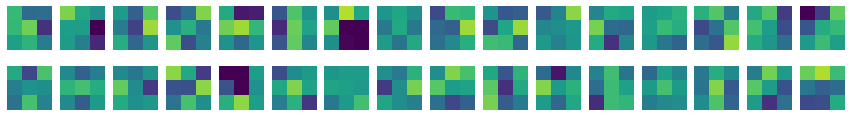

In [12]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [13]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [14]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0019500413 0.083024405


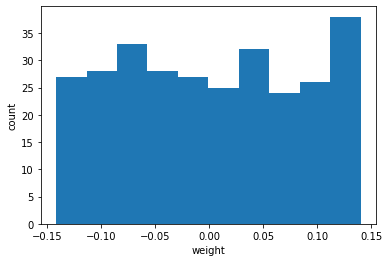

In [15]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

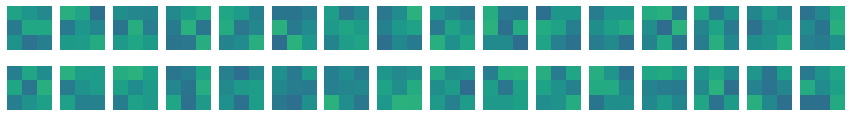

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [32]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [33]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [34]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

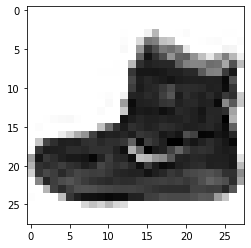

In [35]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [36]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

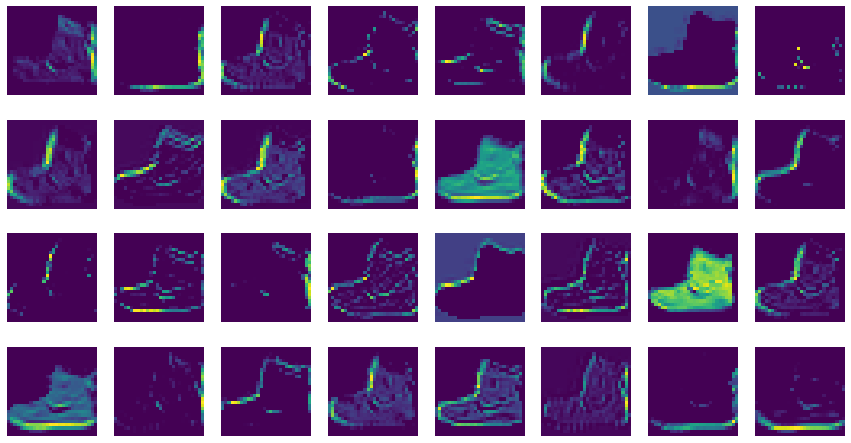

In [37]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [38]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [39]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [40]:
print(feature_maps.shape)

(1, 14, 14, 64)


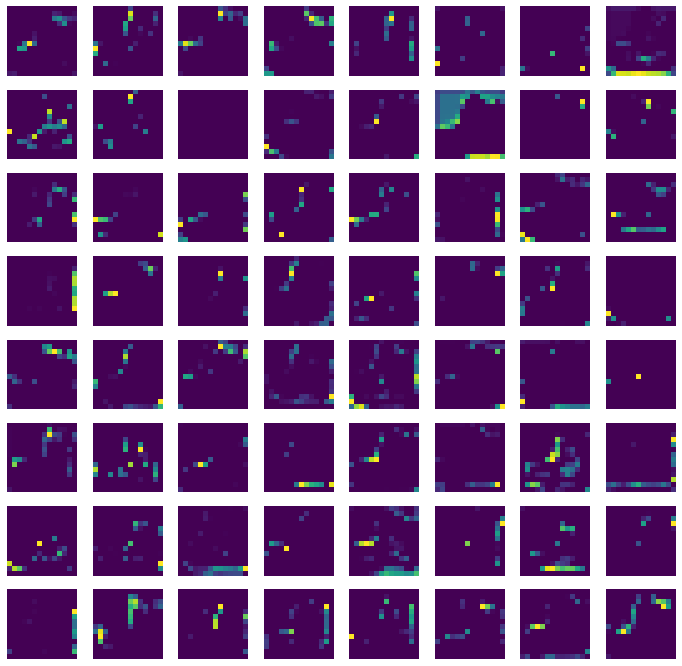

In [41]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()